In [10]:
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt


In [31]:
face_cascade = cv2.CascadeClassifier('../src/features/haarcascades/haarcascade_frontalface_default.xml')

def ROI(img):
    offset = 30 
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    for (x,y,w,h) in face_rects: 
        roi = face_img[y-offset:y+h+offset,x-offset:x+w+offset] 
    return roi

def save_faces(arquivo_video):
    cap = cv2.VideoCapture(arquivo_video)
    ret,frame = cap.read()
    count = 0
    #try:
    while count < 10:
        cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
        ret,frame = cap.read()
        image0 = frame
        image0 = ROI(frame)
        arquivo = arquivo_video.replace("../data/external/","").replace(".mp4","")
        arquivo_nome = "../data/interim/"+ arquivo + "_" + str(count) + ".jpg"
        cv2.imwrite(arquivo_nome,image0)
        count = count + 1
        print(count)
        print(arquivo)
        print(arquivo_nome)
    #except:
    #    pass

In [32]:
arquivo_video = glob('../data/external/*.mp4')[0]
save_faces(arquivo_video)

1
video_upload
../data/interim/video_upload_0.jpg
2
video_upload
../data/interim/video_upload_1.jpg
3
video_upload
../data/interim/video_upload_2.jpg
4
video_upload
../data/interim/video_upload_3.jpg
5
video_upload
../data/interim/video_upload_4.jpg
6
video_upload
../data/interim/video_upload_5.jpg
7
video_upload
../data/interim/video_upload_6.jpg
8
video_upload
../data/interim/video_upload_7.jpg
9
video_upload
../data/interim/video_upload_8.jpg
10
video_upload
../data/interim/video_upload_9.jpg


In [8]:
cap = cv2.VideoCapture(arquivo_video)
ret,frame = cap.read()
count = 0

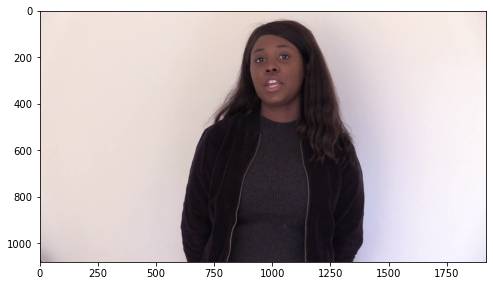

In [12]:
def display_img(img):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

display_img(frame)

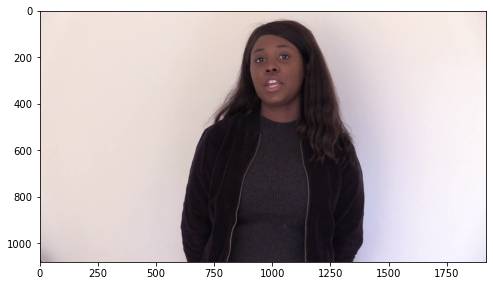

In [14]:
cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
ret,frame = cap.read()
image0 = frame
display_img(image0)

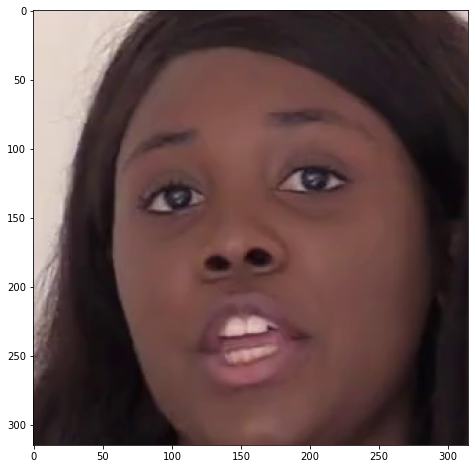

In [16]:
display_img(ROI(image0))

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Tamanho a imagem e canais
image_dimensions = {'height':256, 'width':256, 'channels':3}

# Classe do classificador
class Classifier:
    def __init__():
        self.model = 0 
    def predict(self, x):
        return self.model.predict(x)  
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    def load(self, path):
        self.model.load_weights(path)

# Rede Mesonet usando o Classificador
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)
    
# Utilização de pesos já treinados
meso = Meso4()
meso.load('../src/models/Meso4_DF.h5')

/Users/diegoabreu/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [126]:
# Preparação da imagem

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)
directory = '../data/interim/'
# Instantiating generator to feed images through the network

generator = dataGenerator.flow_from_directory(
    directory,
    target_size=(256, 256),
    class_mode=None,
    batch_size=1,
    shuffle=False
)


Found 10 images belonging to 1 classes.


In [136]:
frame = []
real = []
fake = []
for i in range(10):
    X = generator.next()
    pred = meso.predict(X)[0][0]
    frame.append(i)
    real.append(pred)
    fake.append(1-pred)
resultado_real = sum(real)/len(real)
resultado_fake = 1 - resultado_real

    

In [135]:
(0.98144674 + 0.9986396+0.9954721+0.9973723 +0.9932517+0.99831694 + 0.9971266+0.9976499+0.9903793 +0.9980978)/10

0.9947752979999999

In [143]:
sum(real)

9.947752892971039

In [142]:
len(real)

10

In [146]:
import imageio
frames_gif = []
for t in glob('../data/interim/faces/*jpg'):
    image = imageio.imread(t)
    frames_gif.append(image)

imageio.mimsave('../data/interim/example.gif',frames_gif,duration = 5)